#CNN Image Classification

This notebook is used for explaining the steps involved in using CNN on CIFAR10 dataset

1. Import the required libraries
2. Download the CIFAR10 Dataset
3. Data Preprocessing 
4. Building the model
5. Training the model
6. Making prediction on a test image
7. Evaluating model accuracy

## Note: Set Runtime to GPU before running the notebook

## Import the required libraries

In [96]:
import matplotlib.pyplot as plt 
from tensorflow.keras.datasets import cifar10 
import numpy as np
import pandas as pd
import seaborn as sns 
import tensorflow as tf

##Download the CIFAR10 Dataset

In [97]:
(x_train,y_train),(x_test,y_test)=cifar10.load_data()

## Data Preprocessing

In [98]:
x_train=x_train/255.0
x_test=x_test/255.0

## Building the model

In [99]:
model_CNN=tf.keras.models.Sequential()
model_CNN.add(tf.keras.layers.Conv2D(filters=32,kernel_size=4,padding="same", activation="relu", input_shape=[32,32,3]))
model_CNN.add(tf.keras.layers.Conv2D(filters=32,kernel_size=4,padding="same", activation="relu"))
model_CNN.add(tf.keras.layers.MaxPool2D(pool_size=2,strides=2,padding='valid'))

model_CNN.add(tf.keras.layers.Conv2D(filters=64,kernel_size=4,padding="same", activation="relu"))
model_CNN.add(tf.keras.layers.Conv2D(filters=64,kernel_size=4,padding="same", activation="relu"))
model_CNN.add(tf.keras.layers.MaxPool2D(pool_size=2,strides=2,padding='valid'))

model_CNN.add(tf.keras.layers.Conv2D(filters=32,kernel_size=4,padding="same", activation="relu"))
model_CNN.add(tf.keras.layers.Conv2D(filters=32,kernel_size=4,padding="same", activation="relu"))
model_CNN.add(tf.keras.layers.MaxPool2D(pool_size=2,strides=2,padding='valid'))

model_CNN.add(tf.keras.layers.Flatten())
model_CNN.add(tf.keras.layers.Dropout(0.4,noise_shape=None,seed=None))
model_CNN.add(tf.keras.layers.Dense(units=128,activation='relu'))
model_CNN.add(tf.keras.layers.Dense(units=10,activation='softmax'))
model_CNN.summary()


Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_16 (Conv2D)          (None, 32, 32, 32)        1568      
                                                                 
 conv2d_17 (Conv2D)          (None, 32, 32, 32)        16416     
                                                                 
 max_pooling2d_8 (MaxPooling  (None, 16, 16, 32)       0         
 2D)                                                             
                                                                 
 conv2d_18 (Conv2D)          (None, 16, 16, 64)        32832     
                                                                 
 conv2d_19 (Conv2D)          (None, 16, 16, 64)        65600     
                                                                 
 max_pooling2d_9 (MaxPooling  (None, 8, 8, 64)         0         
 2D)                                                  

In [100]:
model_CNN.compile(loss="sparse_categorical_crossentropy", optimizer="Adam", metrics=["sparse_categorical_accuracy"])

## Training the model

In [101]:
model_CNN.fit(x_train,y_train,epochs=6)

Epoch 1/6
1563/1563 [==============================] - 26s 16ms/step - loss: 1.7126 - sparse_categorical_accuracy: 0.3618
Epoch 2/6
1563/1563 [==============================] - 25s 16ms/step - loss: 1.2319 - sparse_categorical_accuracy: 0.5507
Epoch 3/6
1563/1563 [==============================] - 25s 16ms/step - loss: 1.0531 - sparse_categorical_accuracy: 0.6231
Epoch 4/6
1563/1563 [==============================] - 25s 16ms/step - loss: 0.9376 - sparse_categorical_accuracy: 0.6666
Epoch 5/6
1563/1563 [==============================] - 25s 16ms/step - loss: 0.8625 - sparse_categorical_accuracy: 0.6979
Epoch 6/6
1563/1563 [==============================] - 25s 16ms/step - loss: 0.7985 - sparse_categorical_accuracy: 0.7189


## Making prediction on a test image

In [102]:
sample_image = x_test[8]

#### Displaying the sample image to be used in prediction

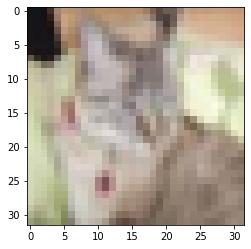

In [103]:
plt.imshow(sample_image)

In [104]:
reshaped_image = sample_image.reshape(1,32,32,3)

In [105]:
predicted_array = model_CNN.predict(reshaped_image)

In [106]:
predicted_array=list(predicted_array)

In [107]:
predicted_array = predicted_array[0]

In [108]:
classes=['airplane','automobile','bird','cat','deer','dog','frog','horse','ship','truck']

In [109]:
predicted_array

array([2.2390070e-03, 9.4186449e-05, 9.7876839e-02, 4.0205160e-01,
       1.5113062e-01, 2.3923130e-01, 1.2527710e-02, 9.3877845e-02,
       4.7305465e-04, 4.9785728e-04], dtype=float32)

In [110]:
mx = 0.0
mx_id = 0
for i in range(10):
  if predicted_array[i]>mx:
    mx_id = i
    mx = predicted_array[i]

#### Printing the class predicted by model

In [111]:
classes[mx_id]      

'cat'

## Evaluating model accuracy

In [112]:
test_accuracy = model_CNN.evaluate(x_test, y_test)

313/313 [==============================] - 3s 9ms/step - loss: 0.8081 - sparse_categorical_accuracy: 0.7144
